# PDE3 Workshop 2 
## Bonus Questions

This notebook contains the bonus questions for the second workshop of the PDE3 course. Attempt these questions only after you have solved the main questions of the workshop.

In [1]:
# Run this cell to import the required modules.
import numpy as np
import matplotlib.pyplot as plt
from auxillary import Jacobi_iteration_vs_error, SOR_iteration_vs_error, calc_Q, Grid

%matplotlib inline  

## Bonus Section 1: Successive Over-Relaxation

The Jacobi iteration scheme we used in the main workshop is relatively simple to implement, but it is not the most efficient iterative scheme.
The Successive Over-Relaxation (SOR) method is a modification of the Jacobi method which can converge faster. It is implemented below.
We will use this scheme to solve the Laplace equation for a second system.

In [2]:
def SOR(mesh: Grid, max_iterations: int, tolerance: float) -> tuple[int, float]:
    """The SOR iteration scheme.
    
    Parameters:
    -----------
    
    mesh: Grid
        The grid on which to implement the SOR iteration.
    
    max_iterations: int
        The maximum number of iterations to perform.
    
    tolerance: float
        The error tolerance.
    
    Returns:
    --------
    
    n_iterations: int
        The number of iterations performed.
    
    error: float
        The error in the solution.
    """

    # calculate the optimal value of omega
    lamda = (np.cos(np.pi/mesh.ni)+np.cos(np.pi/mesh.nj))**2/4
    omega = 2/(1+np.sqrt(1-lamda))
    
    # calculate the coefficients
    beta = mesh.Delta_x()/mesh.Delta_y()
    beta_sq = beta**2
    C_beta = 1/(2*(1+beta_sq))
    
    # initialise u_new 
    u_new = mesh.u.copy()

    n_iterations = 0
    
    # itteration
    while n_iterations < max_iterations:
        for i in range(1,mesh.ni-1):
            for j in range(1,mesh.nj-1):
                u_new[i,j] = (1-omega)*mesh.u[i,j] + omega * C_beta*(u_new[i,j-1]+mesh.u[i,j+1]+ beta_sq*(u_new[i-1,j]+mesh.u[i+1,j]))
        
        
        # compute the difference between the new and old solutions
        err = np.max(abs(mesh.u-u_new))
        
        # update the solution
        mesh.u = np.copy(u_new)
        
        # converged?
        if err < tolerance:
            break
        
        n_iterations += 1
    
    return n_iterations, err # return the number of iterations and the final residual

For this part of the workshop, we will solve a Laplace equation

$$
\dfrac{\partial^2 v}{\partial x^2} + \dfrac{\partial^2 v}{\partial y^2} = 0,
$$

with the following boundary conditions:
* $v(0, y) = 0, \quad y\ge0$,
* $v(1, y) = 0, \quad y\ge0$,
* $v(x, y\to\infty) \to 0, \quad 0\le x\le1$,
* $v(x, 0) = \sin^5(\pi x), \quad 0\le x\le1$,

in the region given by $0\le x\le1$ and $y\ge0$.


### a)
Use the `Grid` class to set up a mesh and implement the boundary conditions for this problem.
Produce a plot showing that these boundary conditions have been implemented correctly.
In terms of numerical implementation, it is not possible to implement a boundary condition at $y\to\infty$ directly.
However, this can usually be resolved by taking an upper bound that is sufficiently large for $y$.
For this problem, we can replace $v(x, y\to\infty) \to 0$ with $v(x,3)=0$.

[Hint: You may find the [``plt.pcolor()``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html) function useful for plotting the grid. You may also find it useful to look at how the mesh was set up when we did the Jacobi iteration in the previous section.]

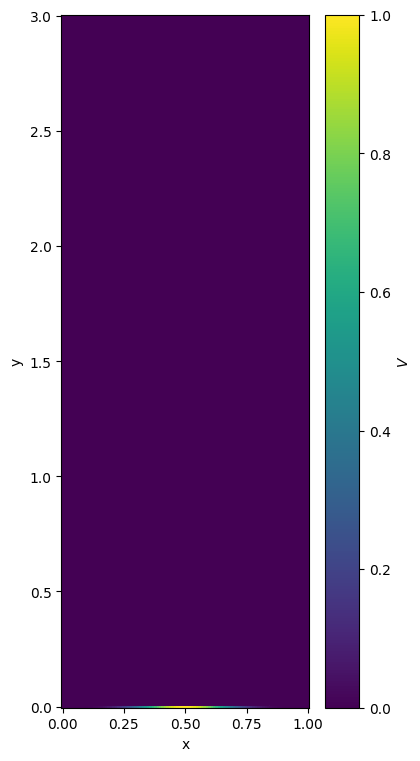

In [3]:
# Your code here:

### BEGIN SOLUTION ###
SOR_mesh = Grid(101,301)
SOR_mesh.set_extent(1., 3.)
SOR_mesh.generate()
SOR_mesh.u[0,:] = 0
SOR_mesh.u[-1,:] = 0
SOR_mesh.u[:,0] = np.sin(np.pi*SOR_mesh.x[:,0])**5
SOR_mesh.u[:,-1] = 0


fig = plt.figure(figsize=(4,9))
plt.pcolor(SOR_mesh.x, SOR_mesh.y, SOR_mesh.u)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label(r'$V$')
plt.show()

### END SOLUTION ###

### b) 

Use the SOR implementation above to solve the Laplace equation for this system. Plot the resulting solution.

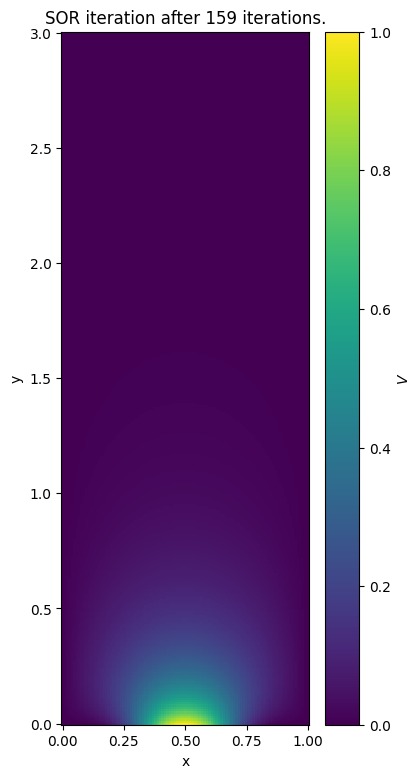

In [4]:
# Your code here:

### BEGIN SOLUTION ###

iter, err = SOR(SOR_mesh, 10000, 1e-6)

fig = plt.figure(figsize=(4,9))
plt.pcolor(SOR_mesh.x, SOR_mesh.y, SOR_mesh.u)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('$V$')
plt.title(f"SOR iteration after {iter} iterations.")
plt.show()

### END SOLUTION ###

## Bonus Section 2: Error Analysis

In the last section, we solved the Laplace equation subject to the following boundary conditions:

* $v(0, y) = 0, \quad y\ge0$
* $v(1, y) = 0, \quad y\ge0$
* $v(x, y\to\infty) \to 0, \quad 0\le x\le1$
* $v(x, 0) = \sin^5(\pi x), \quad 0\le x\le1$

### a)
Use the method of separation of variables to solve the Laplace equation subject to these boundary conditions.

You might want to use the identity
$$
\sin^5\theta = \frac{1}{16}\left(\sin 5\theta - 5 \sin 3\theta + 10 \sin\theta \right)
$$

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

We have 

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0
$$
Subject to:
1. $u(0, y) = 0, \quad y\ge0$
2. $u(1, y) = 0, \quad y\ge0$
3. $u(x, y\to\infty) \to 0, \quad 0\le x\le1$
4. $u(x, 0) = \sin^5(\pi x), \quad 0\le x\le1$

We want separable solutions so are looking for solutions of the form $u(x,y) = X(x)Y(y)$

So we have:

$\frac{X''}{X} -\frac{Y''}{Y} = \lambda^2$

Boundary conditions 1 and 2 imply

$$
X(x) = A\sin(\lambda x) + B\cos(\lambda x)
$$

and bounday conditions 3 and 4 imply

$$
Y(y) = Ce^{-\lambda y} + De^{\lambda y}
$$

which gives

$$
u(x,y) = X(x)Y(y) = (A\sin(\lambda x) + B\cos(\lambda x))(Ce^{-\lambda y} + De^{\lambda y}).
$$

Now, we need to find the constants.


Looking again at BCs 1 and 2:

We need $U(0,y) = 0$ and $U(1,y) = 0$ so we need

$$
X(x) = A_n \sin(n\pi x)
$$

where $n$ is an integer.
Hence, $\lambda = n\pi$ and $B = 0$.

Now looking at BC 3:

$U(x, y\to\infty) \to 0 \implies D = 0$.

This gives us a solution of the form:

$$
u_n(x,y) = A_n \sin(n\pi x)C_n e^{-n\pi y}
$$
Defining $\alpha_n = A_nC_n$ we have a series of super-imposed solutions:

$$
u(x,y) = \sum_{n=0}^\infty \alpha_n \sin(n\pi x)e^{-n\pi y}
$$

We can use BC 4 to work out which of these solutions are present in the final solution.

We have
$$
u(x,0) = \sin^5(\pi x) = \frac{1}{16}\left[ \sin(5\pi x) - 5 \sin(3\pi x) + 10 sin(\pi x)\right] =\sum_{n=0}^\infty \alpha_n \sin(n\pi x)
$$
So we only want $n=1, n=3, n=5$ in the final solution.

Hence, the final solution is:

$$
u(x,y) = \frac{1}{16}\left(e^{-5\pi y}\sin 5 \pi x  - 5 e^{-3\pi y}\sin 3\pi x +e^{-\pi y} 10 \sin\pi x \right)
$$

</font>

### b)
Implement the analytic solution you have found as a Python function called `analytic` and compare the result with the numerical solution from Section 2b for the main Jupyter notebook for Workshop 2.


State why using $y=3$ was a suitable cutoff for the grid in Section 2b.

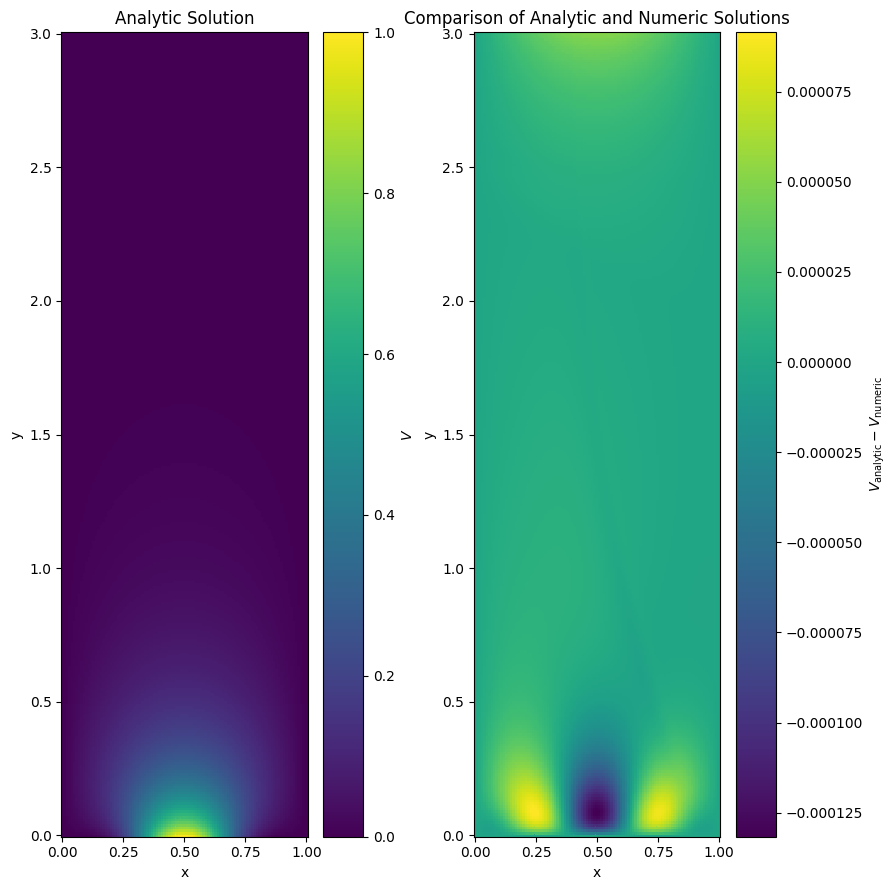

In [5]:
# Your code here.

### BEGIN SOLUTION ###

SOR_mesh = Grid(101,301)
SOR_mesh.set_extent(1., 3.)
SOR_mesh.generate()
SOR_mesh.u[0,:] = 0
SOR_mesh.u[-1,:] = 0
SOR_mesh.u[:,0] = np.sin(np.pi*SOR_mesh.x[:,0])**5
SOR_mesh.u[:,-1] = 0

iter, err = SOR(SOR_mesh, 10000, 1e-6)

def analytic(x,y):
    return 1/16*(np.exp(-5*np.pi*y)*np.sin(5*np.pi*x)-5*np.exp(-3*np.pi*y)*np.sin(3*np.pi*x)+10*np.exp(-np.pi*y)*np.sin(np.pi*x))

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

c1 = ax[0].pcolor(SOR_mesh.x, SOR_mesh.y, analytic(SOR_mesh.x, SOR_mesh.y))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title("Analytic Solution")
fig.colorbar(c1, ax=ax[0], label='$V$')

c2 = ax[1].pcolor(SOR_mesh.x, SOR_mesh.y, analytic(SOR_mesh.x, SOR_mesh.y) - SOR_mesh.u)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title("Comparison of Analytic and Numeric Solutions")
fig.colorbar(c2, ax=ax[1], label=r"$V_{\mathrm{analytic}} - V_{\mathrm{numeric}}$")

plt.tight_layout()
plt.show()


analytic_at_2 = analytic(SOR_mesh.x, 2.)
analytic_at_3 = analytic(SOR_mesh.x, 3.)

### END SOLUTION ###

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

A cutoff of $y=3$ was suitable because the exponential term $e^{-n\pi y}$ will decay rapidly towards 0. The maximum value at $y=3$ is $5.04\times10^{-5} \approx 0$. For comparison, at $y=2$ the maximum value is $0.00117$ and at $y=4$ the maximum value is $2.18\times10^{-6}$. Therefore, a cutoff of $y=3$ is a good balance between accuracy and computational efficiency.

</font>

### c)
Produce a plot to show how the error between the numerical (using both Jacobi and SOR schemes) and analytic solutions varies with increasing number of iterations. Comment on how quickly the two schemes converge. 

The error can be calculated as:

$$
\varepsilon = \frac{Q_\text{analytic} - Q_\text{numerical}}{Q_\text{analytic}}
$$

where $Q_i$ is defined as 
$$
Q_i = \int_0^1\int_0^{y_\text{max}} u(x,y)^2 \, dx \, dy
$$

To assist with this question, modified versions of the Jacobi and SOR functions above have been provided in ``auxillary.py`` and have been imported above (these are `Jacobi_iteration_vs_error` and `SOR_iteration_vs_error`). 
These functions take in the computational mesh (`Grid` object) and the list of iteration steps to be sampled. They output the corresponding iterations and the values of $Q$ for those iterations. An implementation of the $Q$ integral is also provided by the function `calc_Q`. 

In [6]:
# The code below sets up the mesh and runs the calculations for Jacobi and SOR schemes

mesh_size = (101,301)
mesh_extent = (1., 3.)

iteration_steps = [2**i for i in range(0,11)]

def setup_mesh(mesh_size: tuple[int,int], mesh_extent: tuple[float,float]) -> Grid:
    mesh = Grid(*mesh_size)
    mesh.set_extent(*mesh_extent)
    mesh.generate()
    mesh.u[0,:] = 0
    mesh.u[-1,:] = 0
    mesh.u[:,0] = np.sin(np.pi*mesh.x[:,0])**5
    mesh.u[:,-1] = 0
    return mesh


mesh_Jacobi = setup_mesh(mesh_size, mesh_extent)
iterations_Jacobi, Qs_Jacobi = Jacobi_iteration_vs_error(mesh=mesh_Jacobi, iterations_to_sample=iteration_steps)

mesh_SOR = setup_mesh(mesh_size, mesh_extent)
iterations_SOR, Qs_SOR = SOR_iteration_vs_error(mesh=mesh_SOR, iterations_to_sample=iteration_steps)

mesh_analytic = setup_mesh(mesh_size, mesh_extent)
mesh_analytic.u = analytic(mesh_analytic.x, mesh_analytic.y)
Q_analytic = calc_Q(mesh_analytic)


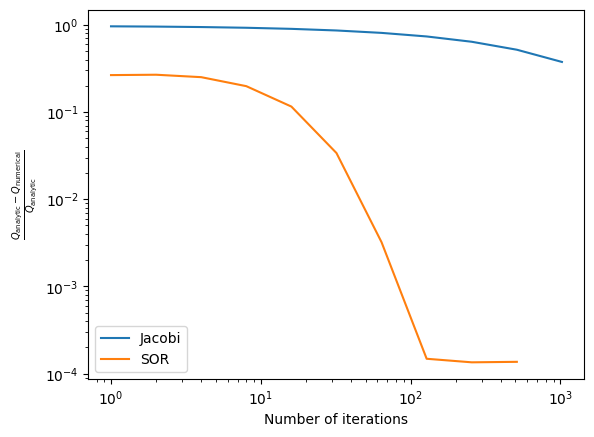

In [7]:
# Your code here

### BEGIN SOLUTION ###
plt.plot(iterations_Jacobi, np.abs((Q_analytic - Qs_Jacobi)/Q_analytic), label='Jacobi')

plt.plot(iterations_SOR, np.abs((Q_analytic - Qs_SOR)/Q_analytic), label='SOR')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\frac{Q_{\mathrm{analytic}} - Q_{\mathrm{numerical}}}{Q_{\mathrm{analytic}}}$')
plt.legend()

plt.show()

### END SOLUTION ###